In [1]:
import pandas as pd
from plotnine import ggplot, aes, geom_col, coord_flip, labs, theme_minimal
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/Users/kopo/Documents/pycon_africa/acs2017_county_data.csv")
data.head()

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,...,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,...,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,...,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,...,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,...,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


In [3]:
print("Columns available:", list(data.columns))

Columns available: ['CountyId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen', 'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty', 'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment']


In [4]:
california_data = data[data["State"] == "California"]
print(f"Number of counties in California: {len(california_data)}")

Number of counties in California: 58


In [5]:
total_population = california_data["TotalPop"].sum()
mean_population = california_data["TotalPop"].mean()
largest_county_row = california_data.loc[california_data["TotalPop"].idxmax()]
largest_county = largest_county_row["County"]
largest_county_pop = largest_county_row["TotalPop"]

In [6]:
print(f"Total population (2017): {total_population:,.0f}")
print(f"Average county population: {mean_population:,.0f}")
print(f"Largest county: {largest_county} ({largest_county_pop:,.0f} people)")

Total population (2017): 38,982,847
Average county population: 672,118
Largest county: Los Angeles County (10,105,722 people)


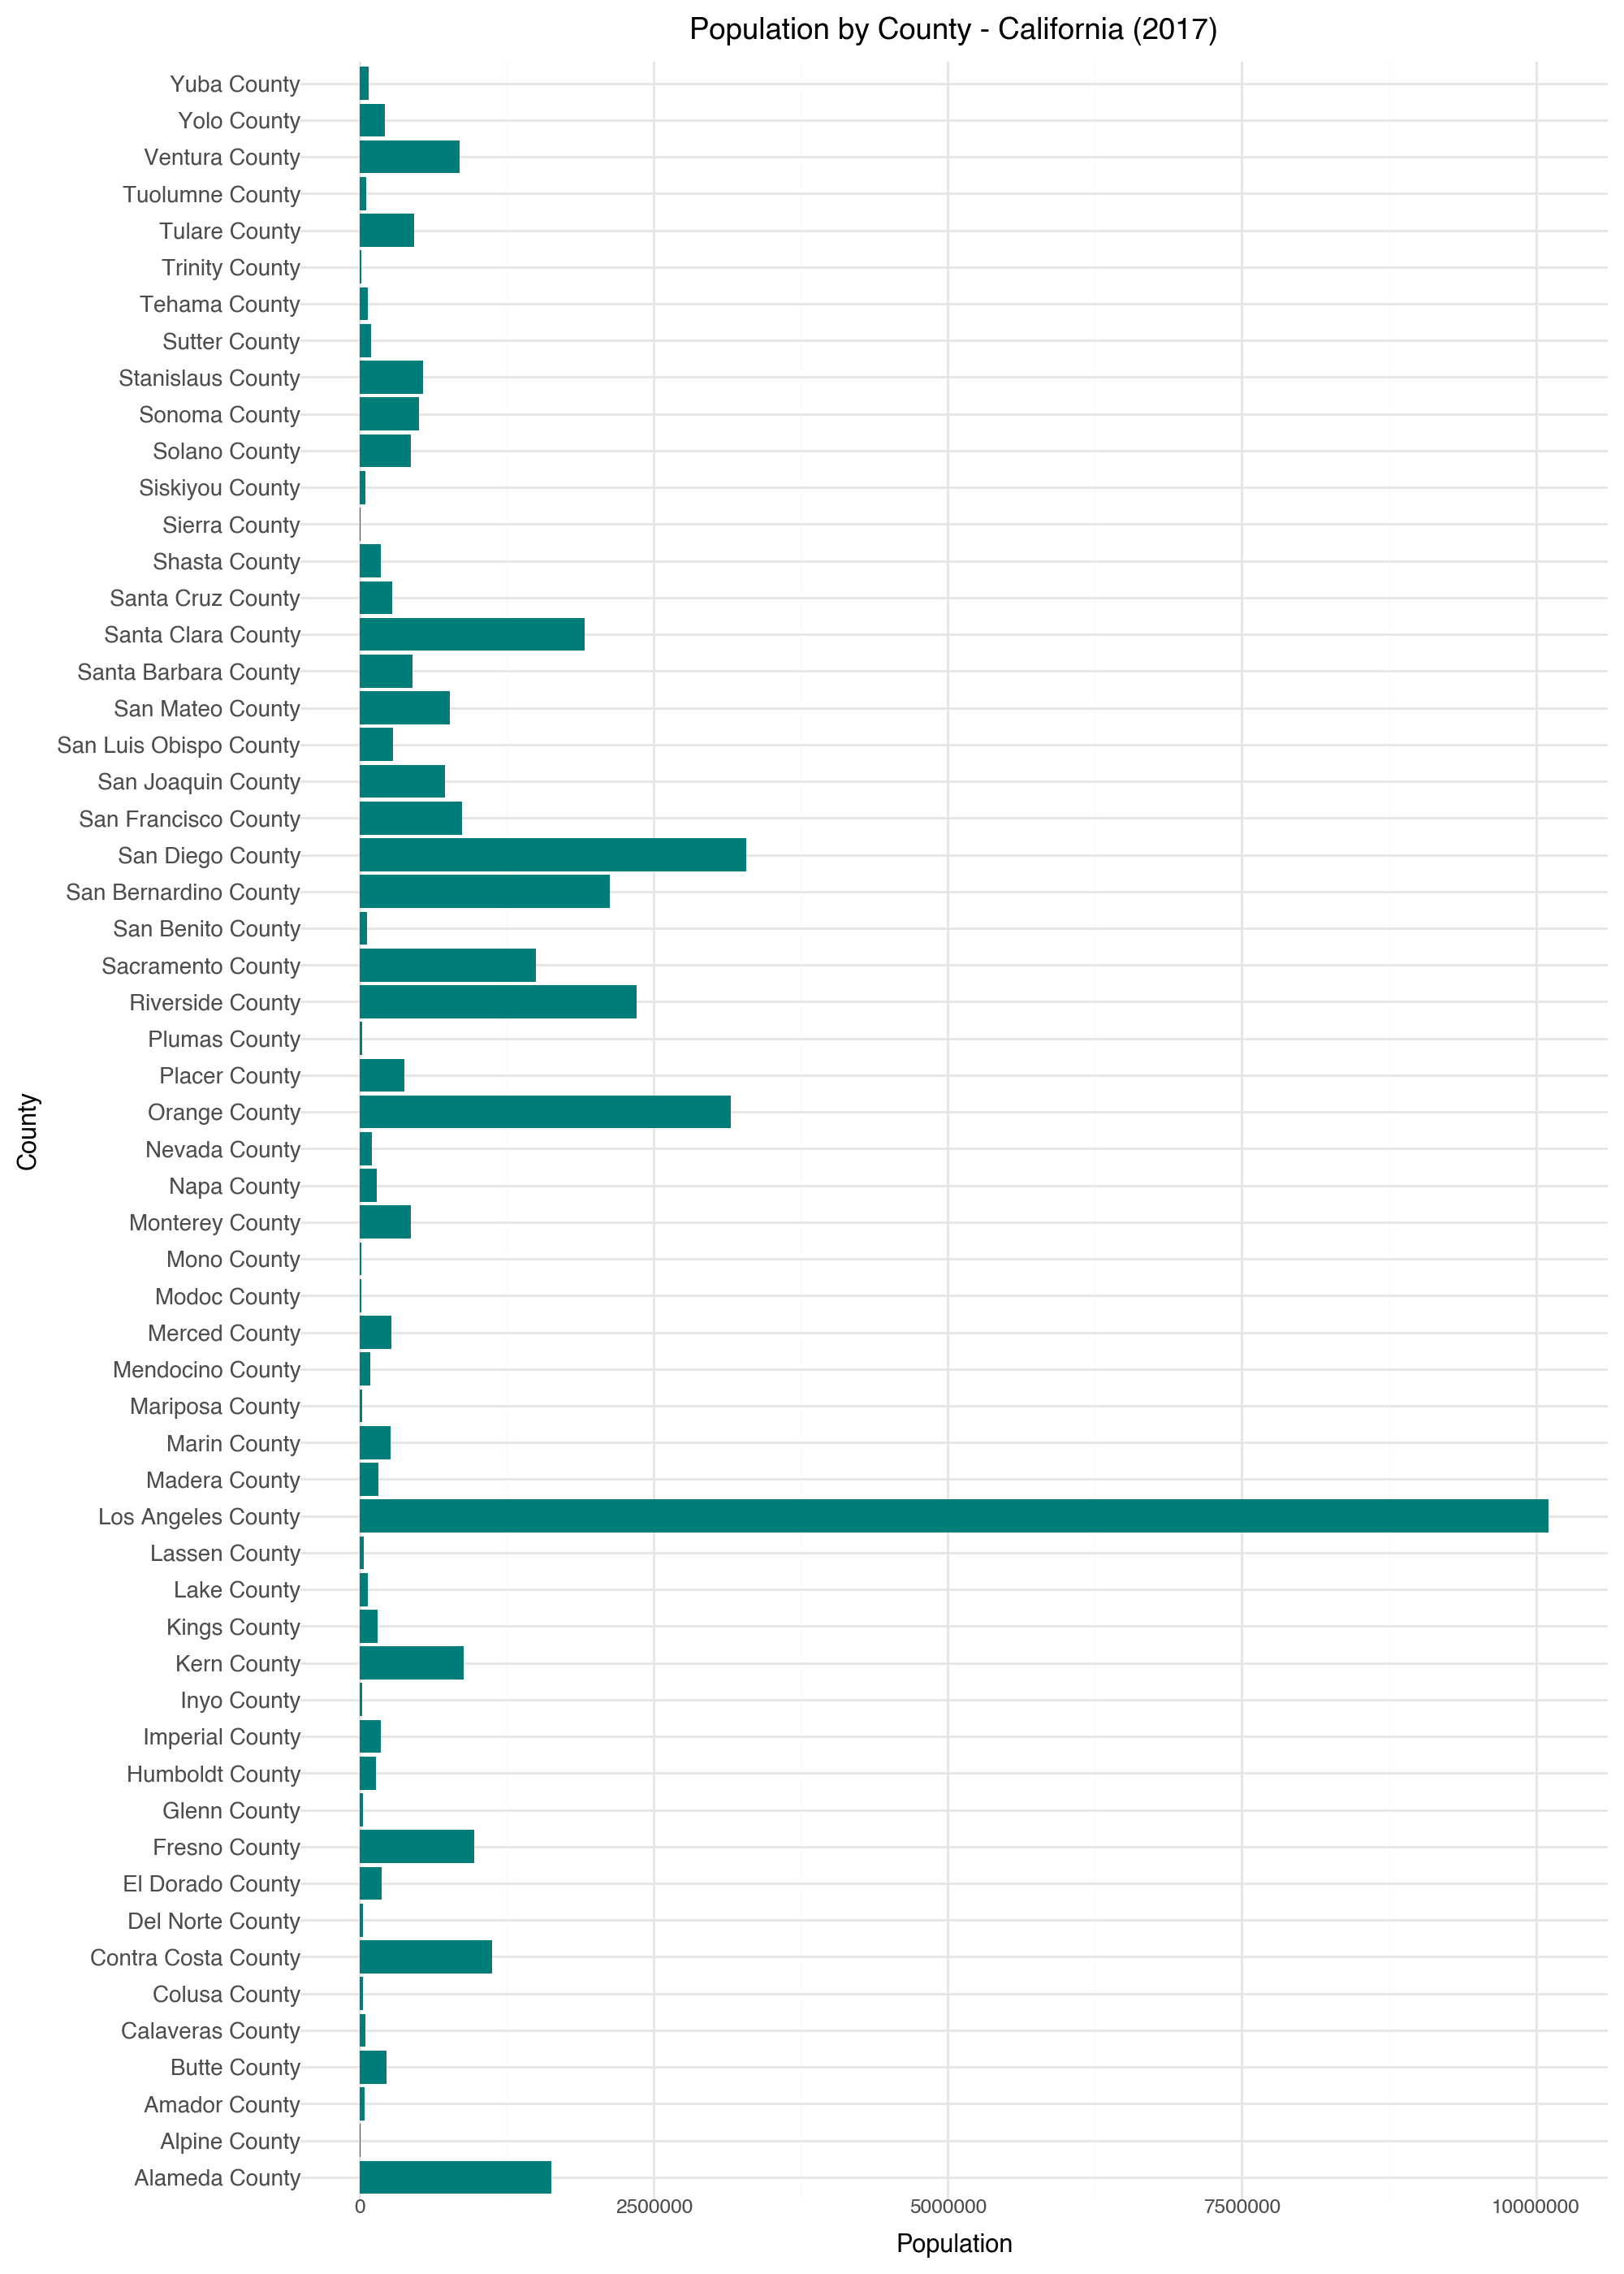

In [7]:
from plotnine import theme, element_text

(
    ggplot(california_data.sort_values("TotalPop"), aes(x="County", y="TotalPop")) +
    geom_col(fill="#007d79") +
    coord_flip() +
    labs(
        title="Population by County - California (2017)",
        x="County",
        y="Population"
    ) +
    theme_minimal() +
    theme(
        figure_size=(10, 14),      # make plot taller
        axis_text_y=element_text(size=10)  # smaller county names
    )
)

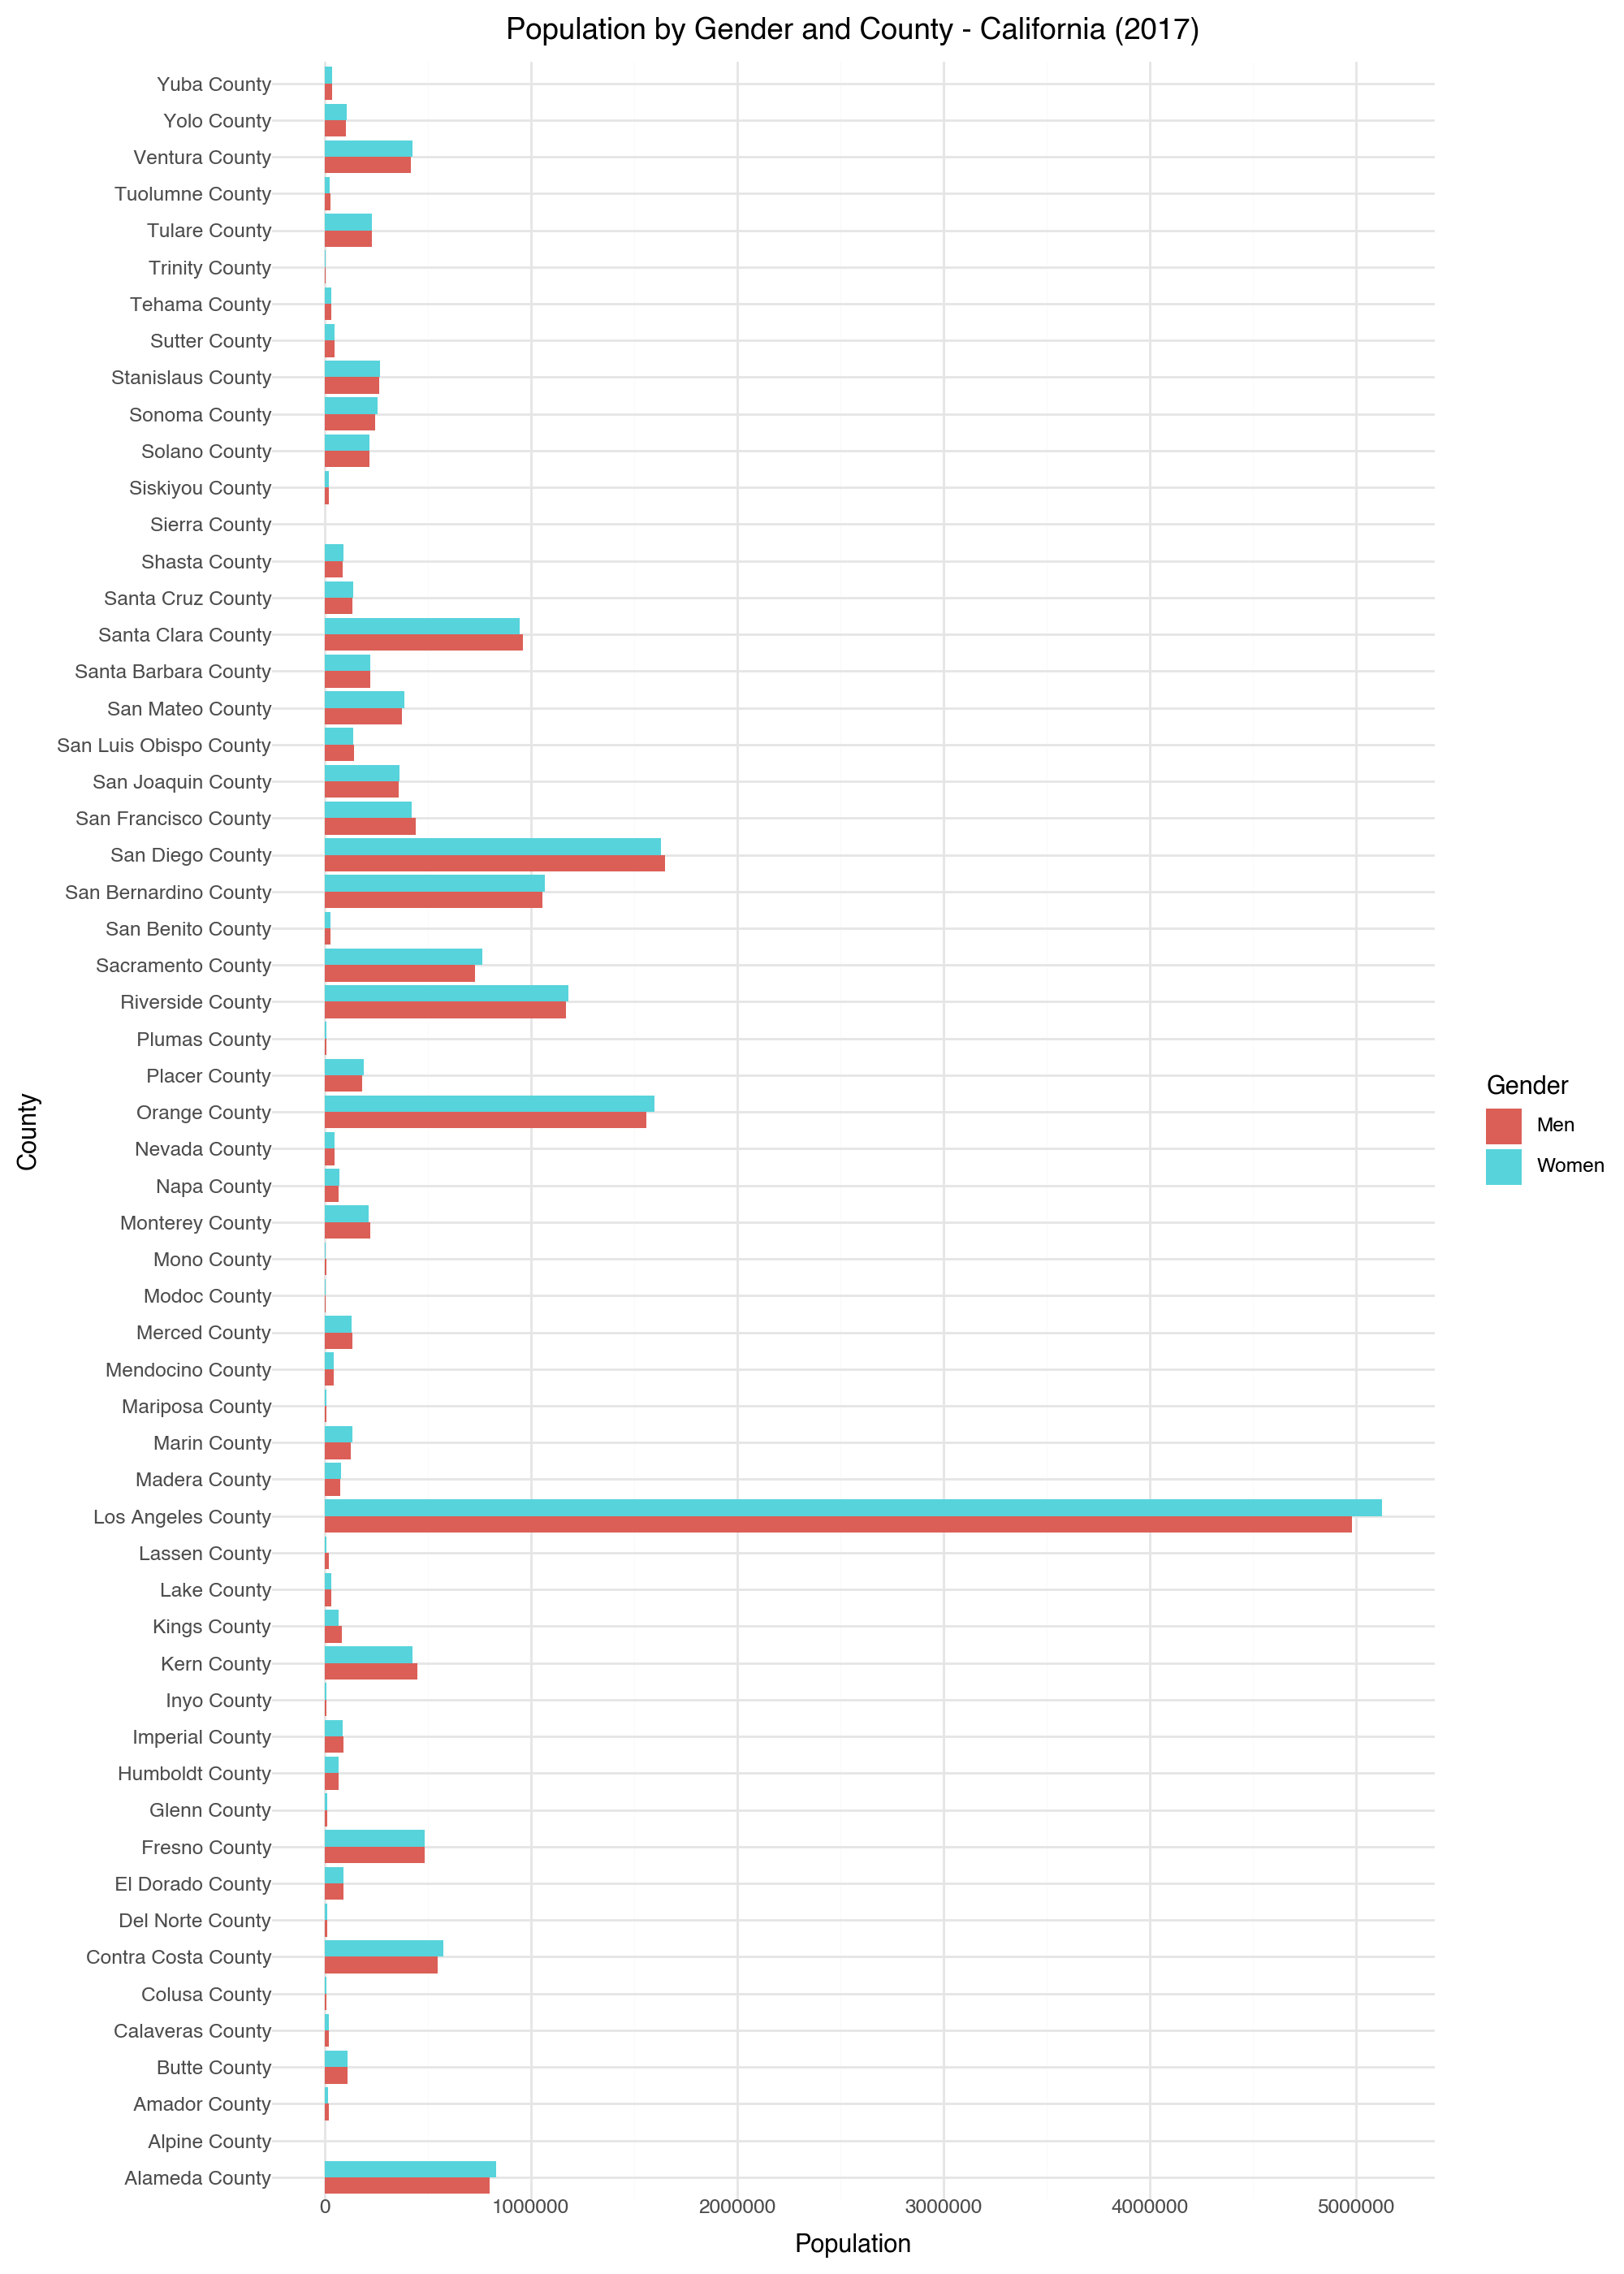

In [8]:
from plotnine import ggplot, aes, geom_col, coord_flip, labs, theme_minimal, theme, position_dodge

gender_data = california_data.melt(
    id_vars=["County"],
    value_vars=["Men", "Women"],
    var_name="Gender",
    value_name="Count"
)

(
    ggplot(gender_data, aes(x="County", y="Count", fill="Gender")) +
    geom_col(position=position_dodge()) +
    coord_flip() +
    labs(
        title="Population by Gender and County - California (2017)",
        x="County",
        y="Population"
    ) +
    theme_minimal() +
    theme(figure_size=(10, 14))
)

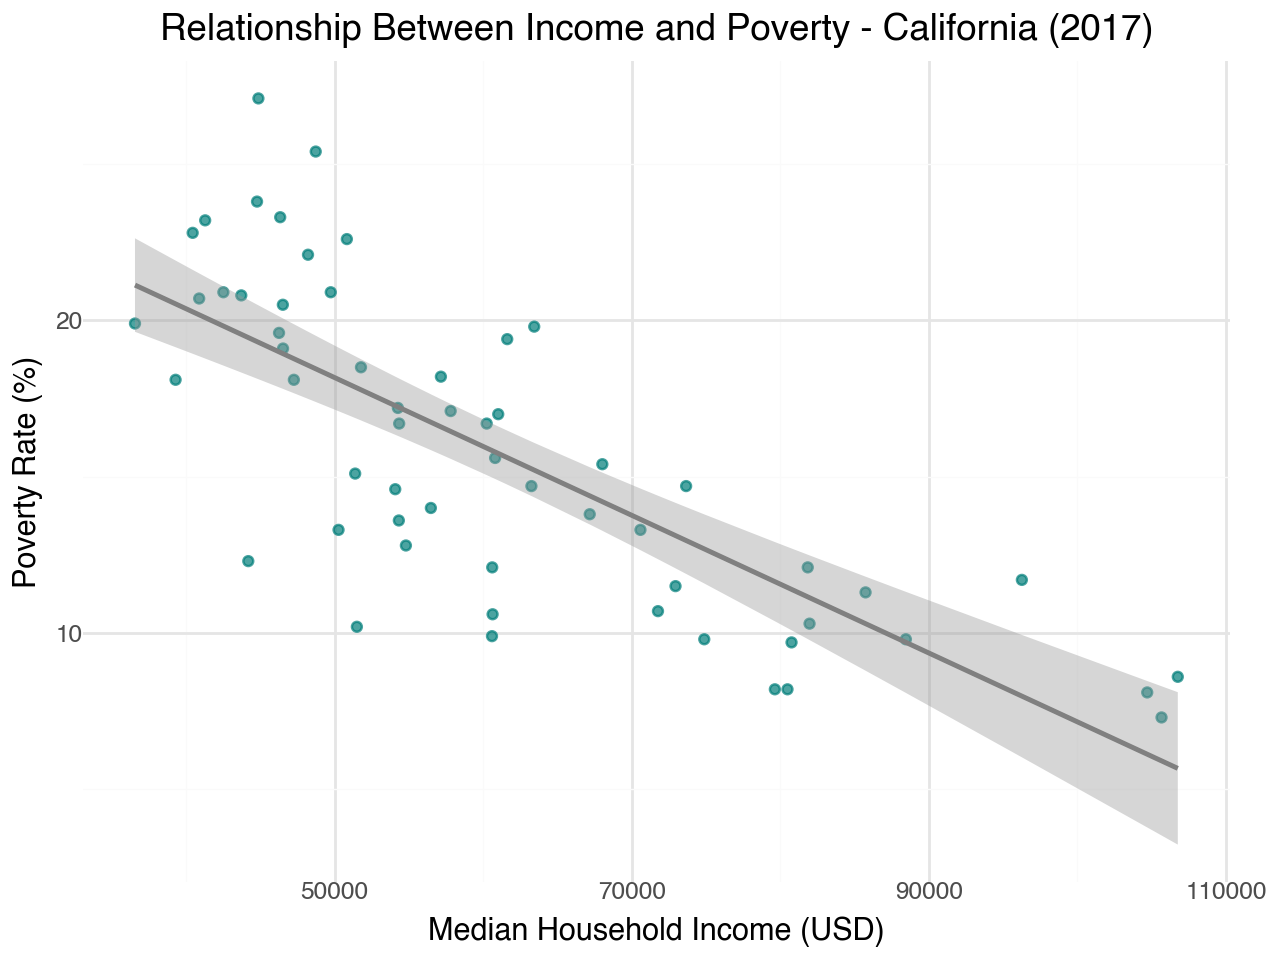

In [9]:
from plotnine import ggplot, aes, geom_point, labs, theme_minimal, geom_smooth

(
    ggplot(california_data, aes(x="Income", y="Poverty")) +
    geom_point(color="#007d79", alpha=0.7) +
    labs(
        title="Relationship Between Income and Poverty - California (2017)",
        x="Median Household Income (USD)",
        y="Poverty Rate (%)"
    ) +
    theme_minimal() +
    geom_smooth(method='lm', color='gray')
)

In [10]:
summary = (
    f"In 2017, California had a total population of {total_population:,.0f}, "
    f"with an average county population of {mean_population:,.0f}. "
    f"The most populous county was {largest_county} with {largest_county_pop:,.0f} residents."
)
print(summary)

In 2017, California had a total population of 38,982,847, with an average county population of 672,118. The most populous county was Los Angeles County with 10,105,722 residents.
